In [1]:
# To read, write, and manipulate data sets in DataFrame format
import pandas as pd
# For mathematical functions
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
# To split data sets into training and testing sets
from sklearn.model_selection import train_test_split
# To standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
# For using the Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
# For classification report
from sklearn.metrics import classification_report
# To compute performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
# For using the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
# To visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
# To compute the confusion matrix
from sklearn.metrics import confusion_matrix
#To found optimal parameters using grid search
from sklearn.model_selection import GridSearchCV
# For using the K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
# For using the Gaussian Naive Bayes Classifier model
from sklearn.naive_bayes import GaussianNB
# To scale features between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading grom csv file and divide the data into columns
mydf = pd.read_csv('data.csv', delimiter = ";")

In [3]:
mydf

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
#To check that any additional null values in the dataset
mydf.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
#To describe the dataset we can check number of samples, number of features, mean and variance for each fea

In [6]:
#To find the of samples and features
mydf.shape

(70000, 13)

In [7]:
#Number of samples is 70000 and number of features is 13 in the dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

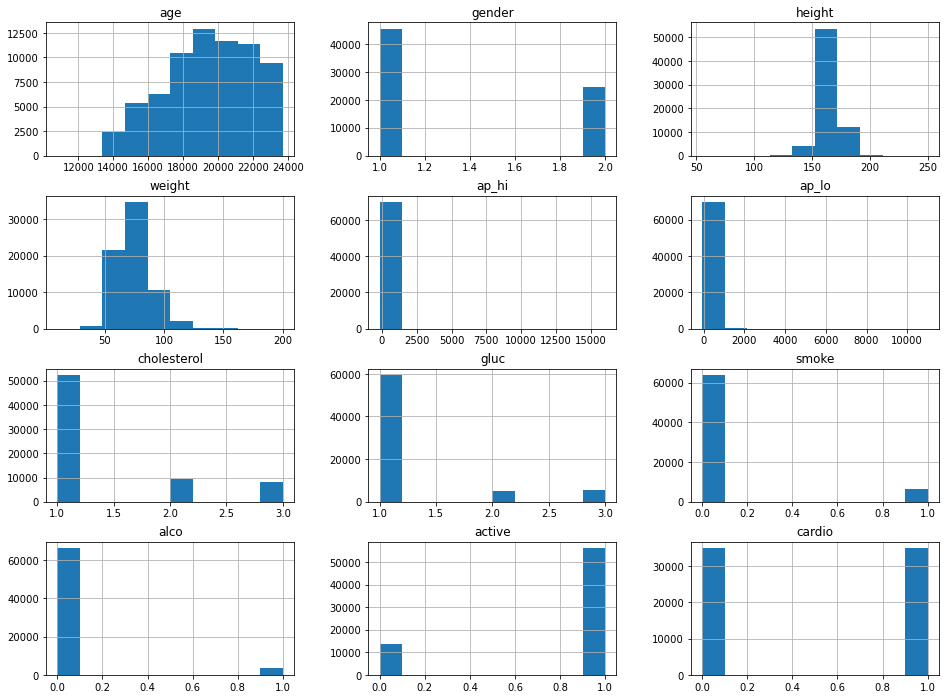

In [8]:
# To create histograms for each feature to visualize their distribution,
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']
mydf[features].hist(figsize=(16, 12))

In [9]:
#To find the mean for each features.
mydf[features].mean()

age            19468.865814
gender             1.349571
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
dtype: float64

In [10]:
#To find the variance for each features.
mydf[features].var()

age            6.087331e+06
gender         2.273745e-01
height         6.740617e+01
weight         2.072378e+02
ap_hi          2.371952e+04
ap_lo          3.552189e+04
cholesterol    4.627405e-01
gluc           3.274933e-01
smoke          8.036307e-02
alco           5.088079e-02
active         1.577512e-01
cardio         2.500035e-01
dtype: float64

In [11]:
#To find correlation matrix
mydf[features].corr(method = 'pearson')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [12]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train, x_test, y_train, y_test = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [13]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [14]:
# Apply StandardScaler for normal distribution
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [15]:
# The training set contains 56000 samples with 11 features each.
x_train.shape

(56000, 11)

In [16]:
# The testing set contains 14000 samples with 11 features each.
x_test.shape

(14000, 11)

In [17]:
# The entire dataset contains 70000 samples with 13 features each.
mydf.shape

(70000, 13)

In [18]:
# DESİCİON TREE

In [19]:
# Compare the scaler methods 

In [20]:
# No Scaler Methods

In [21]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_d_n, x_test_d_n, y_train_d_n, y_test_d_n = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [22]:
# To identify decision tree
mytree=DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)

In [23]:
# To train the decision tree with training data
mytree.fit(x_train_d_n, y_train_d_n)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [24]:
# To make predictions for test data
y_predict_d_n = mytree.predict(x_test_d_n)

In [25]:
y_predict_d_n

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
# To print classification report
print(classification_report(y_test_d_n, mytree.predict(x_test_d_n)))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7110
           1       0.75      0.63      0.68      6890

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



In [27]:
# To calculate performance
accuracy_score_d_n = accuracy_score(y_test_d_n, y_predict_d_n)
precision_score_d_n = precision_score(y_test_d_n, y_predict_d_n, average ="micro")
recall_score_d_n = recall_score(y_test_d_n, y_predict_d_n, average="micro")
f1_score_d_n = f1_score(y_test_d_n, y_predict_d_n, average="micro")
fbeta_score_d_n = fbeta_score(y_test_d_n, y_predict_d_n, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_d_n}')
print(f'Precision: {precision_score_d_n}')
print(f'Recall: {recall_score_d_n}')
print(f'F1 Score: {f1_score_d_n}')
print(f'Fβ Score: {fbeta_score_d_n}')

Accuracy: 0.7135
Precision: 0.7135
Recall: 0.7135
F1 Score: 0.7135
Fβ Score: 0.7135


In [28]:
# MinMaxScaler Method

In [29]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_d_m, x_test_d_m, y_train_d_m, y_test_d_m = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [30]:
# To initialize the MinMaxScaler
scale = MinMaxScaler()

In [31]:
# Apply MinMaxScaler for normal distribution
x_train_d_m_std=scale.fit_transform(x_train_d_m)
x_test_d_m_std=scale.transform(x_test_d_m)

In [32]:
# To identify decision tree
mytree=DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)

In [33]:
# To train the decision tree with training data
mytree.fit(x_train_d_m_std, y_train_d_m)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [34]:
# To make predictions for test data
y_predict_d_m = mytree.predict(x_test_d_m_std)

In [35]:
y_predict_d_m

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
# To print classification report
print(classification_report(y_test_d_m, mytree.predict(x_test_d_m_std)))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7110
           1       0.75      0.63      0.68      6890

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



In [37]:
# To calculate performance
accuracy_score_d_m = accuracy_score(y_test_d_m, y_predict_d_m)
precision_score_d_m = precision_score(y_test_d_m, y_predict_d_m, average ="micro")
recall_score_d_m = recall_score(y_test_d_m, y_predict_d_m, average="micro")
f1_score_d_m = f1_score(y_test_d_m, y_predict_d_m, average="micro")
fbeta_score_d_m = fbeta_score(y_test_d_m, y_predict_d_m, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_d_m}')
print(f'Precision: {precision_score_d_m}')
print(f'Recall: {recall_score_d_m}')
print(f'F1 Score: {f1_score_d_m}')
print(f'Fβ Score: {fbeta_score_d_m}')

Accuracy: 0.7135
Precision: 0.7135
Recall: 0.7135
F1 Score: 0.7135
Fβ Score: 0.7135


In [38]:
# StandardScaler Method

In [39]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [40]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [41]:
# Apply MinMaxScaler for normal distribution
x_train_d_std=scaler.fit_transform(x_train_d)
x_test_d_std=scaler.transform(x_test_d)

In [42]:
# To identify decision tree
mytree=DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)

In [43]:
# To train the decision tree with training data
mytree.fit(x_train_d_std, y_train_d)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [44]:
# To make predictions for test data
y_predict_d = mytree.predict(x_test_d_std)

In [45]:
y_predict_d

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [46]:
# To print classification report
print(classification_report(y_test_d, mytree.predict(x_test_d_std)))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7110
           1       0.75      0.63      0.68      6890

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



In [47]:
# To calculate performance
accuracy_score_d = accuracy_score(y_test_d, y_predict_d)
precision_score_d = precision_score(y_test_d, y_predict_d, average ="micro")
recall_score_d = recall_score(y_test_d, y_predict_d, average="micro")
f1_score_d = f1_score(y_test_d, y_predict_d, average="micro")
fbeta_score_d = fbeta_score(y_test_d, y_predict_d, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_d}')
print(f'Precision: {precision_score_d}')
print(f'Recall: {recall_score_d}')
print(f'F1 Score: {f1_score_d}')
print("Fβ Score:", fbeta_score_d)

Accuracy: 0.7135
Precision: 0.7135
Recall: 0.7135
F1 Score: 0.7135
Fβ Score: 0.7135


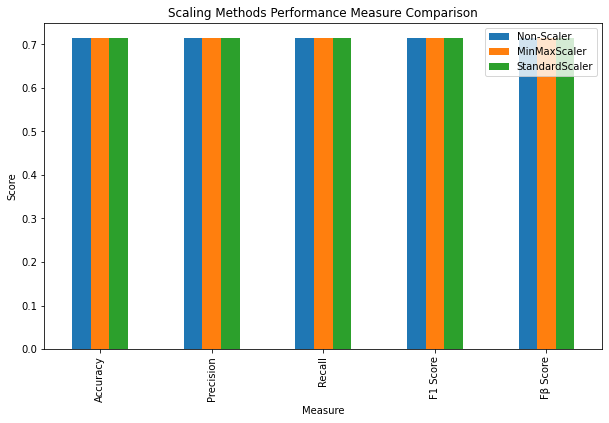

In [48]:
# To create a bar graph to compare the performance of the scaling methods
performance = {
    'Measure': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fβ Score'],
    'Non-Scaler': [accuracy_score_d_n, precision_score_d_n,recall_score_d_n, f1_score_d_n, fbeta_score_d_n],
    'MinMaxScaler': [accuracy_score_d_m, precision_score_d_m,recall_score_d_m, f1_score_d_m, fbeta_score_d_m],
    'StandardScaler': [accuracy_score_d, precision_score_d,recall_score_d, f1_score_d, fbeta_score_d]
}


df_performance = pd.DataFrame(performance)
df_performance.set_index('Measure', inplace=True)
ax = df_performance.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Score')
ax.set_title('Scaling Methods Performance Measure Comparison')

plt.show()

In [49]:
#To identify different parameters to be tried in the model
grid_params_d = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_leaf": [4, 8, 12, 16]
}

# To create the model and setting its parameter
grid_search_d = GridSearchCV(mytree, grid_params_d, verbose=1, scoring="f1", cv=5, n_jobs=-1)

In [50]:
# It aims to find the best parameters among the options given for the model and to evaluate the performance of the model.
grid_search_d

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [4, 8, 12, 16]},
             scoring='f1', verbose=1)

In [51]:
# To train the grid search with training data
grid_search_d.fit(x_train_d_std,y_train_d)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [4, 8, 12, 16]},
             scoring='f1', verbose=1)

In [52]:
# Get the results of the grid search
grid_results = pd.DataFrame(grid_search_d.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093928,0.010250,0.006402,0.000489,3,4,"{'max_depth': 3, 'min_samples_leaf': 4}",0.709454,0.716471,0.710876,0.713304,0.707537,0.711528,0.003106,17
1,0.107127,0.007237,0.008730,0.003674,3,8,"{'max_depth': 3, 'min_samples_leaf': 8}",0.709454,0.716471,0.710876,0.713304,0.707537,0.711528,0.003106,17
2,0.096698,0.005827,0.006401,0.000493,3,12,"{'max_depth': 3, 'min_samples_leaf': 12}",0.709454,0.716471,0.710876,0.713304,0.707537,0.711528,0.003106,17
3,0.110308,0.010025,0.005998,0.000632,3,16,"{'max_depth': 3, 'min_samples_leaf': 16}",0.709454,0.716471,0.710876,0.713304,0.707537,0.711528,0.003106,17
4,0.143904,0.023911,0.008400,0.003824,4,4,"{'max_depth': 4, 'min_samples_leaf': 4}",0.727972,0.731501,0.725769,0.731224,0.726655,0.728624,0.002345,1
5,0.131314,0.014543,0.006399,0.000490,4,8,"{'max_depth': 4, 'min_samples_leaf': 8}",0.727972,0.731501,0.725769,0.731224,0.726655,0.728624,0.002345,1
6,0.122223,0.008596,0.007402,0.001356,4,12,"{'max_depth': 4, 'min_samples_leaf': 12}",0.727972,0.731501,0.725769,0.731224,0.726655,0.728624,0.002345,1
7,0.135129,0.009331,0.007801,0.003599,4,16,"{'max_depth': 4, 'min_samples_leaf': 16}",0.727972,0.731501,0.725769,0.731224,0.726655,0.728624,0.002345,1
8,0.147389,0.014356,0.006329,0.000422,5,4,"{'max_depth': 5, 'min_samples_leaf': 4}",0.713745,0.717379,0.711119,0.720425,0.713868,0.715307,0.003241,13
9,0.151383,0.016601,0.006510,0.000446,5,8,"{'max_depth': 5, 'min_samples_leaf': 8}",0.713745,0.717379,0.711119,0.720425,0.713868,0.715307,0.003241,13


In [53]:
# Get the results of the grid search
grid_resultss = grid_results[['param_max_depth', 'param_min_samples_leaf', 'rank_test_score']]
grid_resultss

,param_max_depth,param_min_samples_leaf,rank_test_score
0,3,4,17
1,3,8,17
2,3,12,17
3,3,16,17
4,4,4,1
5,4,8,1
6,4,12,1
7,4,16,1
8,5,4,13
9,5,8,13


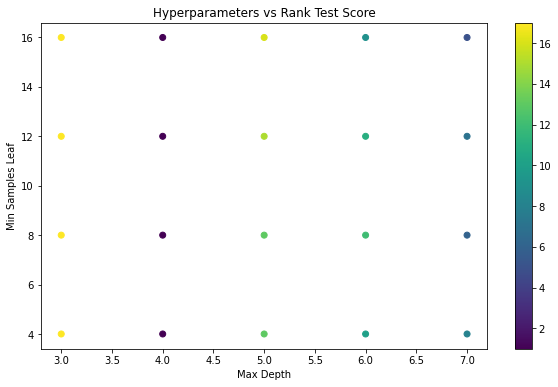

In [54]:
# To create a colorbar and scatter to compare the performance of the different hyperparameters
df = pd.DataFrame({
    'param_max_depth': [3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
    'param_min_samples_leaf': [4, 8, 12, 16, 4, 8, 12, 16, 4, 8, 12, 16, 4, 8, 12, 16, 4, 8, 12, 16],
    'rank_test_score': [17, 17, 17, 17, 1, 1, 1, 1, 13, 13, 15, 16, 10, 12, 11, 9, 8, 6, 7, 5]
})

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['param_max_depth'], df['param_min_samples_leaf'], c=df['rank_test_score'], cmap='viridis')
plt.colorbar(scatter)

plt.title('Hyperparameters vs Rank Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Min Samples Leaf')

plt.show()

In [55]:
# To print best estimator
grid_search_d.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       random_state=0)

In [56]:
# To make predictions for test data
grid_search_d.best_estimator_.predict(x_test_d_std)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [57]:
# To print best parameters
grid_search_d.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [58]:
# To print best score
grid_search_d.best_score_

0.7286241058212759

In [59]:
# To identify decision tree according to best parameters
mytree_b=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, random_state=0)

In [60]:
# To train the decision tree with training data
mytree_b.fit(x_train_d_std, y_train_d)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       random_state=0)

In [61]:
# To make predictions for test data
y_predict_d_b = mytree_b.predict(x_test_d_std)

In [62]:
y_predict_d_b

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
# To print classification report
print(classification_report(y_test_d, mytree_b.predict(x_test_d_std)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7110
           1       0.72      0.72      0.72      6890

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [64]:
# To calculate performance
accuracy_score_d_b = accuracy_score(y_test_d, y_predict_d_b)
precision_score_d_b = precision_score(y_test_d, y_predict_d_b, average ="micro")
recall_score_d_b = recall_score(y_test_d, y_predict_d_b, average="micro")
f1_score_d_b = f1_score(y_test_d, y_predict_d_b, average="micro")
fbeta_score_d_b = fbeta_score(y_test_d, y_predict_d_b, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_d_b}')
print(f'Precision: {precision_score_d_b}')
print(f'Recall: {recall_score_d_b}')
print(f'F1 Score: {f1_score_d_b}')
print("Fβ Score:", fbeta_score_d_b)

Accuracy: 0.7265
Precision: 0.7265
Recall: 0.7265
F1 Score: 0.7265
Fβ Score: 0.7265


In [65]:
# To calculate confusion matrix
cm=confusion_matrix(y_test_d, mytree_b.predict(x_test_d_std))

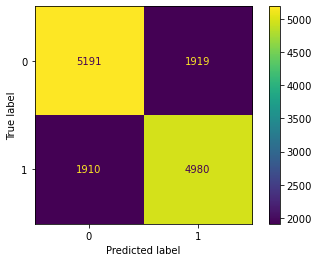

In [66]:
# To plot the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [67]:
# RANDOM FOREST

In [68]:
# Compare the different features grouph

In [69]:
# Highly Correlated Feature Group 

In [70]:
# To split dataset into training and test sets
features = ['age','cholesterol','weight','gluc','ap_lo','ap_hi','gender']
x_train_f_c, x_test_f_c, y_train_f_c, y_test_f_c = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [71]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [72]:
# Apply StandardScaler for normal distribution
x_train_f_c_std=scaler.fit_transform(x_train_f_c)
x_test_f_c_std=scaler.transform(x_test_f_c)

In [73]:
# To identify random forest
myforest=RandomForestClassifier(criterion="entropy",n_estimators=100,max_depth=4, random_state=0)

In [74]:
# To train the random forest with training data
myforest.fit(x_train_f_c_std, y_train_f_c)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [75]:
# To make predictions for test data
y_predict_f_c = myforest.predict(x_test_f_c_std)

In [76]:
y_predict_f_c

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [77]:
# To get prediction probabilities for test data
myforest.predict_proba(x_test_f_c_std)

array([[0.59666092, 0.40333908],
       [0.64771853, 0.35228147],
       [0.39607147, 0.60392853],
       ...,
       [0.2073356 , 0.7926644 ],
       [0.69337576, 0.30662424],
       [0.43888141, 0.56111859]])

In [78]:
# To print classification report
print(classification_report(y_test_f_c, myforest.predict(x_test_f_c_std)))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7110
           1       0.76      0.65      0.70      6890

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [79]:
# To calculate performance
accuracy_score_f_c = accuracy_score(y_test_f_c, y_predict_f_c)
precision_score_f_c = precision_score(y_test_f_c, y_predict_f_c, average ="micro")
recall_score_f_c = recall_score(y_test_f_c, y_predict_f_c, average="micro")
f1_score_f_c = f1_score(y_test_f_c, y_predict_f_c, average="micro")
fbeta_score_f_c = fbeta_score(y_test_f_c, y_predict_f_c, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_f_c}')
print(f'Precision: {precision_score_f_c}')
print(f'Recall: {recall_score_f_c}')
print(f'F1 Score: {f1_score_f_c}')
print(f"Fβ Score:", fbeta_score_f_c)

Accuracy: 0.7296428571428571
Precision: 0.7296428571428571
Recall: 0.7296428571428571
F1 Score: 0.7296428571428573
Fβ Score: 0.7296428571428571


In [80]:
# Low Correlation Feature Group Performance

In [81]:
# To split dataset into training and test sets
features = ['alco','height','smoke','active']
x_train_f_cl, x_test_f_cl, y_train_f_cl, y_test_f_cl = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [82]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [83]:
# Apply StandardScaler for normal distribution
x_train_f_cl_std=scaler.fit_transform(x_train_f_cl)
x_test_f_cl_std=scaler.transform(x_test_f_cl)

In [84]:
# To identify random forest
myforest=RandomForestClassifier(criterion="entropy",n_estimators=100,max_depth=4, random_state=0)

In [85]:
# To train the random forest with training data
myforest.fit(x_train_f_cl_std,y_train_f_cl)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [86]:
# To make predictions for test data
y_predict_f_cl = myforest.predict(x_test_f_cl_std)

In [87]:
y_predict_f_cl

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [88]:
# To get prediction probabilities for test data
myforest.predict_proba(x_test_f_cl_std)

array([[0.5133351 , 0.4866649 ],
       [0.51408435, 0.48591565],
       [0.51192198, 0.48807802],
       ...,
       [0.52602274, 0.47397726],
       [0.5133351 , 0.4866649 ],
       [0.48639378, 0.51360622]])

In [89]:
# To print classification report
print(classification_report(y_test_f_cl, myforest.predict(x_test_f_cl_std)))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57      7110
           1       0.51      0.38      0.44      6890

    accuracy                           0.51     14000
   macro avg       0.51      0.51      0.50     14000
weighted avg       0.51      0.51      0.51     14000



In [90]:
# To calculate performance
accuracy_score_f_cl = accuracy_score(y_test_f_cl, y_predict_f_cl)
precision_score_f_cl = precision_score(y_test_f_cl, y_predict_f_cl, average ="micro")
recall_score_f_cl = recall_score(y_test_f_cl, y_predict_f_cl, average="micro")
f1_score_f_cl = f1_score(y_test_f_cl, y_predict_f_cl, average="micro")
fbeta_score_f_cl = fbeta_score(y_test_f_cl, y_predict_f_cl, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_f_cl}')
print(f'Precision: {precision_score_f_cl}')
print(f'Recall: {recall_score_f_cl}')
print(f'F1 Score: {f1_score_f_cl}')
print(f"Fβ Score:", fbeta_score_f_cl)

Accuracy: 0.5139285714285714
Precision: 0.5139285714285714
Recall: 0.5139285714285714
F1 Score: 0.5139285714285714
Fβ Score: 0.5139285714285714


In [91]:
# Using All Features Group Performance

In [92]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [93]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [94]:
# Apply StandardScaler for normal distribution
x_train_f_std=scaler.fit_transform(x_train_f)
x_test_f_std=scaler.transform(x_test_f)

In [95]:
# To identify random forest
myforest=RandomForestClassifier(criterion="entropy",n_estimators=100,max_depth=4, random_state=0)

In [96]:
# To train the random forest with training data
myforest.fit(x_train_f_std,y_train_f)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [97]:
# To make predictions for test data
y_predict_f = myforest.predict(x_test_f_std)

In [98]:
y_predict_f

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [99]:
# To get prediction probabilities for test data
myforest.predict_proba(x_test_f_std)

array([[0.60382989, 0.39617011],
       [0.64222237, 0.35777763],
       [0.38154659, 0.61845341],
       ...,
       [0.21955434, 0.78044566],
       [0.70747688, 0.29252312],
       [0.42992689, 0.57007311]])

In [100]:
# To print classification report
print(classification_report(y_test_f, myforest.predict(x_test_f_std)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7110
           1       0.76      0.66      0.71      6890

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [101]:
# To calculate performance
accuracy_score_f = accuracy_score(y_test_f, y_predict_f)
precision_score_f = precision_score(y_test_f, y_predict_f, average ="micro")
recall_score_f = recall_score(y_test_f, y_predict_f, average="micro")
f1_score_f = f1_score(y_test_f, y_predict_f, average="micro")
fbeta_score_f = fbeta_score(y_test_f, y_predict_f, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_f}')
print(f'Precision: {precision_score_f}')
print(f'Recall: {recall_score_f}')
print(f'F1 Score: {f1_score_f}')
print(f"Fβ Score:", fbeta_score_f)

Accuracy: 0.7287142857142858
Precision: 0.7287142857142858
Recall: 0.7287142857142858
F1 Score: 0.7287142857142858
Fβ Score: 0.7287142857142858


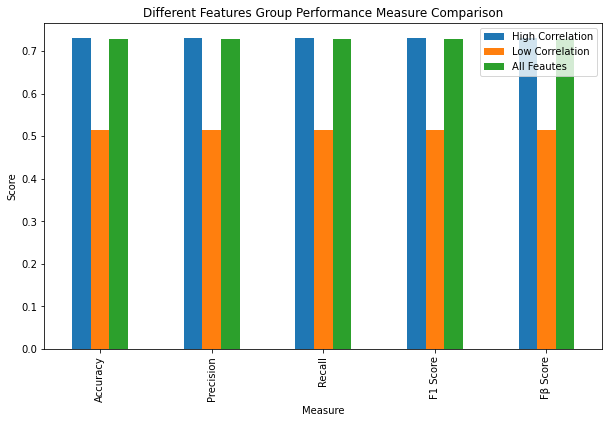

In [102]:
# To create a bar graph to compare the performance of the different feature
performance = {
    'Measure': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fβ Score'],
    'High Correlation': [accuracy_score_f_c, precision_score_f_c,recall_score_f_c, f1_score_f_c, fbeta_score_f_c],
    'Low Correlation': [accuracy_score_f_cl, precision_score_f_cl,recall_score_f_cl, f1_score_f_cl, fbeta_score_f_cl],
    'All Feautes': [accuracy_score_f, precision_score_f,recall_score_f, f1_score_f, fbeta_score_f]
}


df_performance = pd.DataFrame(performance)
df_performance.set_index('Measure', inplace=True)
ax = df_performance.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Score')
ax.set_title('Different Features Group Performance Measure Comparison')

plt.show()

In [103]:
# To identify different parameters to be tried in the model
grid_params_f = {
    "n_estimators": [10, 30, 100, 200],
    "max_depth": [3, 5, 9, 11],
    "min_samples_leaf": [4, 8, 12, 16],
}

# To create the model and setting its parameter
grid_search_f = GridSearchCV(myforest, grid_params_f, verbose=1, scoring="f1", cv=5, n_jobs=-1)

In [104]:
# It aims to find the best parameters among the options given for the model and to evaluate the performance of the model.
grid_search_f

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 9, 11],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'n_estimators': [10, 30, 100, 200]},
             scoring='f1', verbose=1)

In [105]:
# To train the grid search with training data
grid_search_f.fit(x_train_f_std,y_train_f)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 9, 11],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'n_estimators': [10, 30, 100, 200]},
             scoring='f1', verbose=1)

In [106]:
# Get the results of the grid search
grid_results_f = pd.DataFrame(grid_search_f.cv_results_)
grid_results_f

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.287083,0.013456,0.018002,0.002280,3,4,10,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.688714,0.701850,0.695372,0.704165,0.699116,0.697843,0.005424,63
1,0.856885,0.089474,0.036394,0.001023,3,4,30,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.693459,0.701706,0.700724,0.704736,0.695223,0.699170,0.004196,59
2,3.013175,0.219770,0.105001,0.002607,3,4,100,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.704937,0.708083,0.707707,0.709011,0.701552,0.706258,0.002717,54
3,5.696586,0.226919,0.202234,0.003576,3,4,200,"{'max_depth': 3, 'min_samples_leaf': 4, 'n_est...",0.705348,0.708721,0.708962,0.708836,0.702196,0.706813,0.002676,48
4,0.320201,0.032057,0.017599,0.002800,3,8,10,"{'max_depth': 3, 'min_samples_leaf': 8, 'n_est...",0.688714,0.701850,0.695372,0.704165,0.699116,0.697843,0.005424,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,10.643989,0.549388,0.356755,0.023124,11,12,200,"{'max_depth': 11, 'min_samples_leaf': 12, 'n_e...",0.721060,0.731590,0.718314,0.726982,0.717545,0.723098,0.005387,7
60,0.534482,0.008170,0.024400,0.000493,11,16,10,"{'max_depth': 11, 'min_samples_leaf': 16, 'n_e...",0.722129,0.730481,0.716283,0.722754,0.719579,0.722245,0.004707,11
61,1.534790,0.017243,0.061131,0.003352,11,16,30,"{'max_depth': 11, 'min_samples_leaf': 16, 'n_e...",0.719963,0.728219,0.717475,0.722651,0.719519,0.721565,0.003713,13
62,5.070049,0.098775,0.174826,0.014545,11,16,100,"{'max_depth': 11, 'min_samples_leaf': 16, 'n_e...",0.721421,0.730433,0.720090,0.727119,0.718382,0.723489,0.004545,4


In [107]:
# Get the results of the grid search
grid_resultss_f = grid_results_f[['param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'rank_test_score']]
grid_resultss_f

,param_max_depth,param_min_samples_leaf,param_n_estimators,rank_test_score
0,3,4,10,63
1,3,4,30,59
2,3,4,100,54
3,3,4,200,48
4,3,8,10,63
...,...,...,...,...
59,11,12,200,7
60,11,16,10,11
61,11,16,30,13
62,11,16,100,4


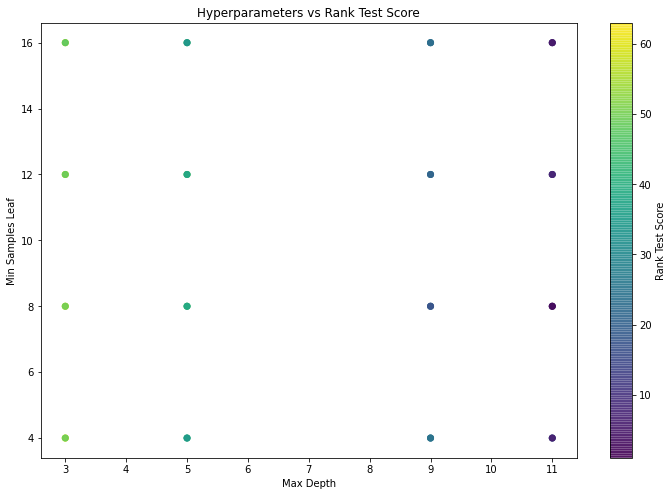

In [108]:
# To create a colorbar and scatter to compare the performance of the different hyperparameters
df = pd.DataFrame( {
   'param_max_depth': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
    'param_min_samples_leaf': [4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 12, 12, 16, 16, 16, 16,4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 12, 12, 16, 16, 16, 16,4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 12, 12, 16, 16, 16, 16,4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 12, 12, 16, 16, 16, 16,],
    'rank_test_score': [63, 59, 54, 48, 63, 59, 52, 49, 61, 57, 55, 47, 61, 57, 53, 46, 45, 41, 36, 34, 51, 44, 39, 38, 56, 42, 40, 37, 50, 43, 35, 33, 28, 30, 18,26, 29,23,16,17,15,31,27,19,32,22,20,24,25,12,9,6,14,1,2,3,21,10,8,7,11,13,4,5]
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['param_max_depth'], df['param_min_samples_leaf'], c=df['rank_test_score'],cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Rank Test Score')

plt.title('Hyperparameters vs Rank Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Min Samples Leaf')

plt.show()

In [109]:
# To print best estimator
grid_search_f.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=8,
                       n_estimators=30, random_state=0)

In [110]:
# To make predictions for test data
grid_search_f.best_estimator_.predict(x_test_f_std)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [111]:
# To print best parameters
grid_search_f.best_params_

{'max_depth': 11, 'min_samples_leaf': 8, 'n_estimators': 30}

In [112]:
# To print best score
grid_search_f.best_score_

0.7245329397831184

In [113]:
# To identify random forest according to best parameters
myforest_b=RandomForestClassifier(criterion="entropy",n_estimators=30,max_depth=11, min_samples_leaf =8, random_state=0)

In [114]:
# To train the random forest with training data
myforest_b.fit(x_train_f_std,y_train_f)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=8,
                       n_estimators=30, random_state=0)

In [115]:
# To make predictions for test data
y_predict_f_b = myforest_b.predict(x_test_f_std)

In [116]:
y_predict_f_b

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [117]:
# To calculate performance
accuracy_score_f_b = accuracy_score(y_test_f, y_predict_f_b)
precision_score_f_b = precision_score(y_test_f, y_predict_f_b, average ="micro")
recall_score_f_b = recall_score(y_test_f, y_predict_f_b, average="micro")
f1_score_f_b = f1_score(y_test_f, y_predict_f_b, average="micro")
fbeta_score_f_b = fbeta_score(y_test_f, y_predict_f_b, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_f_b}')
print(f'Precision: {precision_score_f_b}')
print(f'Recall: {recall_score_f_b}')
print(f'F1 Score: {f1_score_f_b}')
print(f"Fβ Score:", fbeta_score_f_b)

Accuracy: 0.7332142857142857
Precision: 0.7332142857142857
Recall: 0.7332142857142857
F1 Score: 0.7332142857142857
Fβ Score: 0.7332142857142858


In [118]:
# To get prediction probabilities for test data
myforest_b.predict_proba(x_test_f_std)

array([[0.63469446, 0.36530554],
       [0.65448047, 0.34551953],
       [0.40541253, 0.59458747],
       ...,
       [0.20666055, 0.79333945],
       [0.75224754, 0.24775246],
       [0.33896385, 0.66103615]])

In [119]:
# To print classification report
print(classification_report(y_test_f, myforest_b.predict(x_test_f_std)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      7110
           1       0.74      0.70      0.72      6890

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [120]:
# To calculate confusion matrix
cm=confusion_matrix(y_test_f, myforest_b.predict(x_test_f_std))

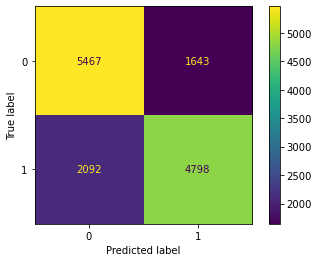

In [121]:
# To plot the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [122]:
# k-NN

In [123]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [124]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [125]:
# Apply StandardScaler for normal distribution
x_train_k_std=scaler.fit_transform(x_train_k)
x_test_k_std=scaler.transform(x_test_k)

In [126]:
# To identify k-NN
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [127]:
# To train the k-NN with training data
knn.fit(x_train_k_std, y_train_k)

KNeighborsClassifier()

In [128]:
# To make predictions for test data
y_predict_k = knn.predict(x_test_k_std)

In [129]:
y_predict_k

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [130]:
# To print classification report
print(classification_report(y_test_k, knn.predict(x_test_k_std)))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      7110
           1       0.64      0.63      0.64      6890

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



In [131]:
# To calculate performance
accuracy_score_k = accuracy_score(y_test_k, y_predict_k)
precision_score_k = precision_score(y_test_k, y_predict_k, average ="micro")
recall_score_k = recall_score(y_test_k, y_predict_k, average="micro")
f1_score_k = f1_score(y_test_k, y_predict_k, average="micro")
fbeta_score_k = fbeta_score(y_test_k, y_predict_k, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_k}')
print(f'Precision: {precision_score_k}')
print(f'Recall: {recall_score_k}')
print(f'F1 Score: {f1_score_k}')
print(f'Fβ Score: {fbeta_score_k}')

Accuracy: 0.6461428571428571
Precision: 0.6461428571428571
Recall: 0.6461428571428571
F1 Score: 0.6461428571428571
Fβ Score: 0.6461428571428571


In [132]:
# To identify different parameters to be tried in the model
grid_params_k={
    "n_neighbors":[3,5,7,11,19],
    "weights":["uniform", "distance"]
}

# To create the model and setting its parameter
grid_search_k = GridSearchCV(knn, grid_params_k, verbose=1, scoring="f1", cv=5, n_jobs=-1)

In [133]:
# It aims to find the best parameters among the options given for the model and to evaluate the performance of the model.
grid_search_k

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [134]:
# To train the grid search with training data
grid_search_k.fit(x_train_k_std,y_train_k)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.3s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [135]:
# Get the results of the grid search
grid_results_k = pd.DataFrame(grid_search_k.cv_results_)
grid_results_k

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.744275,0.225613,8.411477,0.098688,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.622812,0.633101,0.622744,0.631991,0.624116,0.626953,0.004606,9
1,2.156947,0.287584,8.054499,0.230843,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.621685,0.629626,0.619787,0.629747,0.622057,0.624581,0.004240,10
2,1.575669,0.183502,9.724616,0.120935,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.634319,0.642747,0.632528,0.636247,0.640471,0.637263,0.003807,7
3,1.620387,0.102384,9.527005,0.111866,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.631541,0.640759,0.628908,0.635619,0.639205,0.635206,0.004474,8
4,1.463785,0.203581,10.895305,0.196295,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.643349,0.640904,0.644077,0.643131,0.646107,0.643514,0.001675,5
5,1.420367,0.064022,10.458461,0.074810,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.640580,0.641551,0.639457,0.643391,0.645737,0.642143,0.002213,6
6,1.328251,0.059368,12.414728,0.159803,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.646187,0.644678,0.651409,0.648307,0.649673,0.648051,0.002401,3
7,1.322729,0.058125,12.049413,0.262888,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.647314,0.645731,0.645897,0.647327,0.650844,0.647423,0.001839,4
8,1.301225,0.053386,14.077535,0.531252,19,uniform,"{'n_neighbors': 19, 'weights': 'uniform'}",0.653909,0.652333,0.652583,0.652449,0.656971,0.653649,0.001756,1
9,1.259567,0.033702,10.205542,2.998033,19,distance,"{'n_neighbors': 19, 'weights': 'distance'}",0.652498,0.651980,0.650981,0.651176,0.655723,0.652471,0.001715,2


In [136]:
# Get the results of the grid search
grid_resultss_k = grid_results_k[['param_n_neighbors', 'param_weights', 'rank_test_score']]
grid_resultss_k

,param_n_neighbors,param_weights,rank_test_score
0,3,uniform,9
1,3,distance,10
2,5,uniform,7
3,5,distance,8
4,7,uniform,5
5,7,distance,6
6,11,uniform,3
7,11,distance,4
8,19,uniform,1
9,19,distance,2


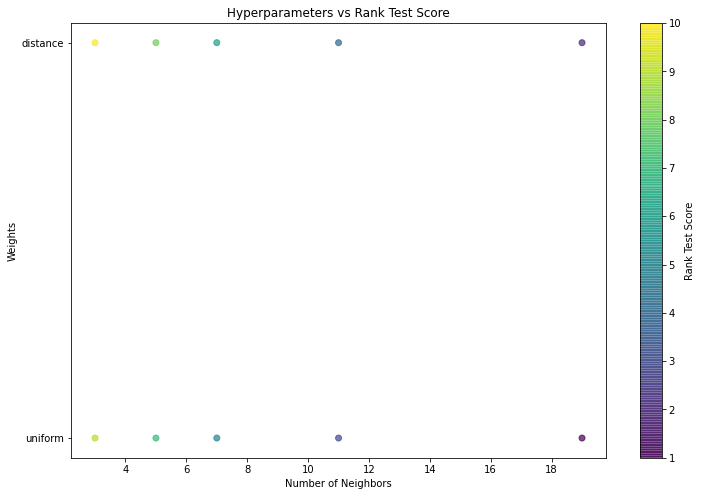

In [137]:
# To create a colorbar and scatter to compare the performance of the different hyperparameters
df = pd.DataFrame( {
   'param_n_neighbors': [3, 3, 5, 5, 7, 7, 11, 11, 19, 19],
    'param_weights': ['uniform', 'distance', 'uniform', 'distance', 'uniform', 'distance', 'uniform', 'distance', 'uniform', 'distance'],
    'rank_test_score': [9, 10, 7, 8, 5, 6, 3, 4, 1, 2]
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['param_n_neighbors'], df['param_weights'], c=df['rank_test_score'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Rank Test Score')

plt.title('Hyperparameters vs Rank Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Weights')

plt.show()

In [138]:
# To print best estimator
grid_search_k.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [139]:
# To make predictions for test data
grid_search_k.best_estimator_.predict(x_test_k_std)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [140]:
# To print best parameters
grid_search_k.best_params_

{'n_neighbors': 19, 'weights': 'uniform'}

In [141]:
# To print best score
grid_search_k.best_score_

0.6536491376699516

In [142]:
# To identify k-NN according to best parameters
knn_b=KNeighborsClassifier(n_neighbors=19, weights="uniform")

In [143]:
# To train the k-NN with training data
knn_b.fit(x_train_k_std, y_train_k)

KNeighborsClassifier(n_neighbors=19)

In [144]:
# To make predictions for test data
y_predict_k_b = knn_b.predict(x_test_k_std)

In [145]:
y_predict_k_b

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [146]:
# To calculate performance
accuracy_score_k_b = accuracy_score(y_test_k, y_predict_k_b)
precision_score_k_b = precision_score(y_test_k, y_predict_k_b, average ="micro")
recall_score_k_b = recall_score(y_test_k, y_predict_k_b, average="micro")
f1_score_k_b = f1_score(y_test_k, y_predict_k_b, average="micro")
fbeta_score_k_b = fbeta_score(y_test_k, y_predict_k_b, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_k_b}')
print(f'Precision: {precision_score_k_b}')
print(f'Recall: {recall_score_k_b}')
print(f'F1 Score: {f1_score_k_b}')
print(f"Fβ Score:", fbeta_score_k_b)

Accuracy: 0.6676428571428571
Precision: 0.6676428571428571
Recall: 0.6676428571428571
F1 Score: 0.6676428571428571
Fβ Score: 0.6676428571428571


In [147]:
# To print classification report
print(classification_report(y_test_k, knn_b.predict(x_test_k_std)))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7110
           1       0.67      0.64      0.66      6890

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.67      0.67      0.67     14000



In [148]:
# To calculate confusion matrix
cm=confusion_matrix(y_test_k, knn_b.predict(x_test_k_std))

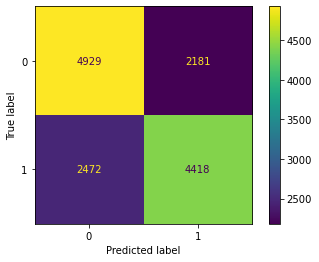

In [149]:
# To plot the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [150]:
# Naive Bayes

In [151]:
# To split dataset into training and test sets
features = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(mydf[features], mydf['cardio'], test_size=0.20, random_state=1234)

In [152]:
# To initialize the StandardScaler
scaler = StandardScaler()

In [153]:
# Apply StandardScaler for normal distribution
x_train_n_std=scaler.fit_transform(x_train_n)
x_test_n_std=scaler.transform(x_test_n)

In [154]:
# To identify Naive Bayes
mynaive = GaussianNB()

In [155]:
# To train the Naive Bayes with training data
mynaive.fit(x_train_n_std,y_train_n)

GaussianNB()

In [156]:
# To make predictions for test data
y_predict_n = mynaive.predict(x_test_n_std)

In [157]:
y_predict_n

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
# To get prediction probabilities for test data
mynaive.predict_proba(x_test_n_std)

array([[0.85408808, 0.14591192],
       [0.84895037, 0.15104963],
       [0.90311835, 0.09688165],
       ...,
       [0.82979711, 0.17020289],
       [0.86237002, 0.13762998],
       [0.79770615, 0.20229385]])

In [159]:
# To print classification report
print(classification_report(y_test_n, mynaive.predict(x_test_n_std)))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      7110
           1       0.72      0.28      0.41      6890

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.55     14000
weighted avg       0.64      0.59      0.55     14000



In [160]:
# To calculate performance
accuracy_score_n = accuracy_score(y_test_n, y_predict_n)
precision_score_n = precision_score(y_test_n, y_predict_n, average ="micro")
recall_score_n = recall_score(y_test_n, y_predict_n, average="micro")
f1_score_n = f1_score(y_test_n, y_predict_n, average="micro")
fbeta_score_n = fbeta_score(y_test_n, y_predict_n, beta=2, average="micro")

# To write performance
print(f'Accuracy: {accuracy_score_n}')
print(f'Precision: {precision_score_n}')
print(f'Recall: {recall_score_n}')
print(f'F1 Score: {f1_score_n}')
print(f"Fβ Score:", fbeta_score_n)

Accuracy: 0.5928571428571429
Precision: 0.5928571428571429
Recall: 0.5928571428571429
F1 Score: 0.5928571428571429
Fβ Score: 0.5928571428571429


In [161]:
# To calculate confusion matrix
cm=confusion_matrix(y_test_n, mynaive.predict(x_test_n_std))

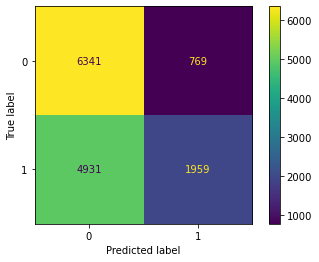

In [162]:
# To plot the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

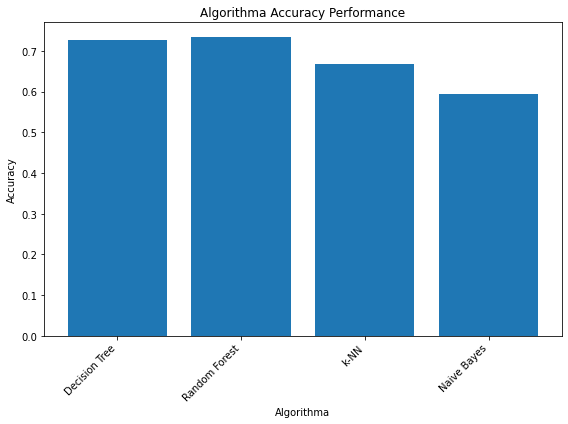

In [163]:
# To create a bar graph to compare the accuracy scores of the algorithms
algorithms = ["Decision Tree", "Random Forest", "k-NN", "Naive Bayes"]
accuracy_scores = [accuracy_score_d_b, accuracy_score_f_b, accuracy_score_k_b, accuracy_score_n]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores)
plt.xlabel("Algorithma")
plt.ylabel("Accuracy")
plt.title("Algorithma Accuracy Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

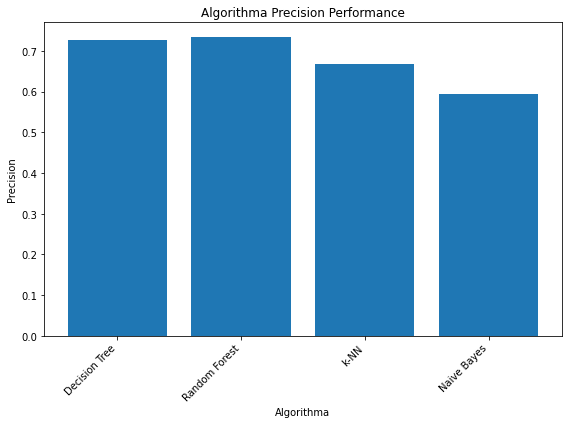

In [164]:
# To create a bar graph to compare the precision scores of the algorithms
algorithms = ["Decision Tree", "Random Forest", "k-NN", "Naive Bayes"]
precision_score = [precision_score_d_b, precision_score_f_b, precision_score_k_b, precision_score_n]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, precision_score)
plt.xlabel("Algorithma")
plt.ylabel("Precision")
plt.title("Algorithma Precision Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

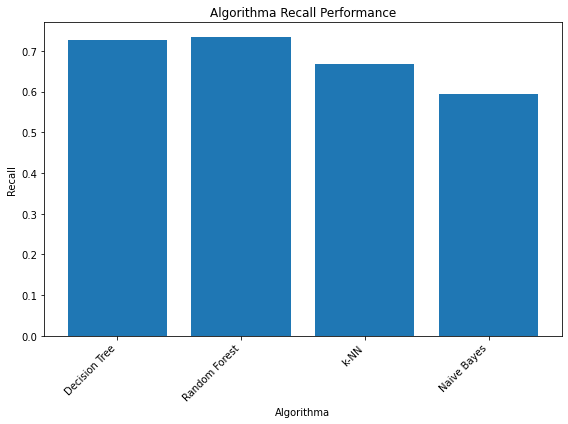

In [165]:
# To create a bar graph to compare the recall scores of the algorithms
algorithms = ["Decision Tree", "Random Forest", "k-NN", "Naive Bayes"]
recall_score = [recall_score_d_b, recall_score_f_b, recall_score_k_b, recall_score_n]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, recall_score)
plt.xlabel("Algorithma")
plt.ylabel("Recall")
plt.title("Algorithma Recall Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

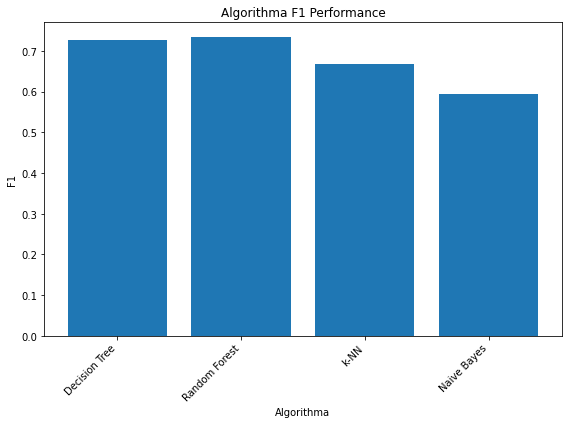

In [166]:
# To create a bar graph to compare the recall scores of the algorithms
algorithms = ["Decision Tree", "Random Forest", "k-NN", "Naive Bayes"]
f1_score = [f1_score_d_b, f1_score_f_b, f1_score_k_b, f1_score_n]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, f1_score)
plt.xlabel("Algorithma")
plt.ylabel("F1")
plt.title("Algorithma F1 Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

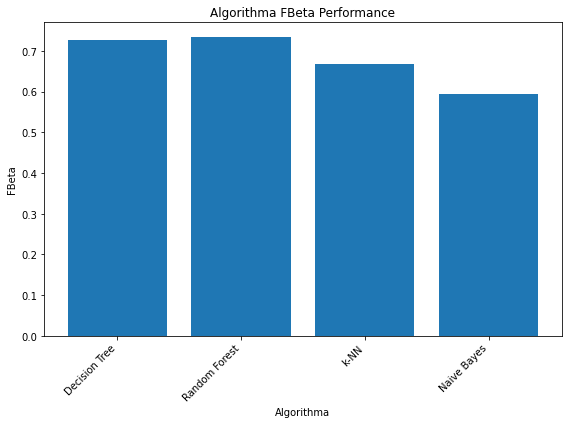

In [167]:
# To create a bar graph to compare the recall scores of the algorithms
algorithms = ["Decision Tree", "Random Forest", "k-NN", "Naive Bayes"]
fbeta_score = [fbeta_score_d_b, fbeta_score_f_b, fbeta_score_k_b, fbeta_score_n]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, fbeta_score)
plt.xlabel("Algorithma")
plt.ylabel("FBeta")
plt.title("Algorithma FBeta Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()